In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:/dlk_data/dataset.csv")

In [3]:
df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
df = df.drop_duplicates()
print( df.shape )

(1781, 21)


In [5]:
 df.isnull().values.any()

True

In [6]:
df = df.dropna(how='any')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        967 non-null    object 
 1   URL_LENGTH                 967 non-null    int64  
 2   NUMBER_SPECIAL_CHARACTERS  967 non-null    int64  
 3   CHARSET                    967 non-null    object 
 4   SERVER                     967 non-null    object 
 5   CONTENT_LENGTH             967 non-null    float64
 6   WHOIS_COUNTRY              967 non-null    object 
 7   WHOIS_STATEPRO             967 non-null    object 
 8   WHOIS_REGDATE              967 non-null    object 
 9   WHOIS_UPDATED_DATE         967 non-null    object 
 10  TCP_CONVERSATION_EXCHANGE  967 non-null    int64  
 11  DIST_REMOTE_TCP_PORT       967 non-null    int64  
 12  REMOTE_IPS                 967 non-null    int64  
 13  APP_BYTES                  967 non-null    int64 

In [8]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [9]:
data = df.drop(['URL','CHARSET', 'SERVER','WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', ], axis = 1)

In [10]:
data

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,160,29,36829.0,19,3,7,2402,25,22,4491,2900,25,6.0,0
1769,161,23,417.0,7,7,2,582,7,11,752,582,7,0.0,0
1774,183,29,4890.0,22,2,7,2062,30,26,8161,2742,30,8.0,0
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0


In [11]:
data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [12]:
data.tail()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1768,160,29,36829.0,19,3,7,2402,25,22,4491,2900,25,6.0,0
1769,161,23,417.0,7,7,2,582,7,11,752,582,7,0.0,0
1774,183,29,4890.0,22,2,7,2062,30,26,8161,2742,30,8.0,0
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1780,249,40,24435.0,19,6,11,2314,25,28,3039,2776,25,6.0,0


## EDA

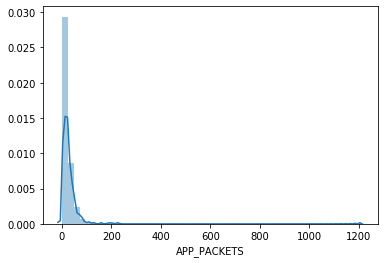

In [37]:
sns.distplot(data.APP_PACKETS)

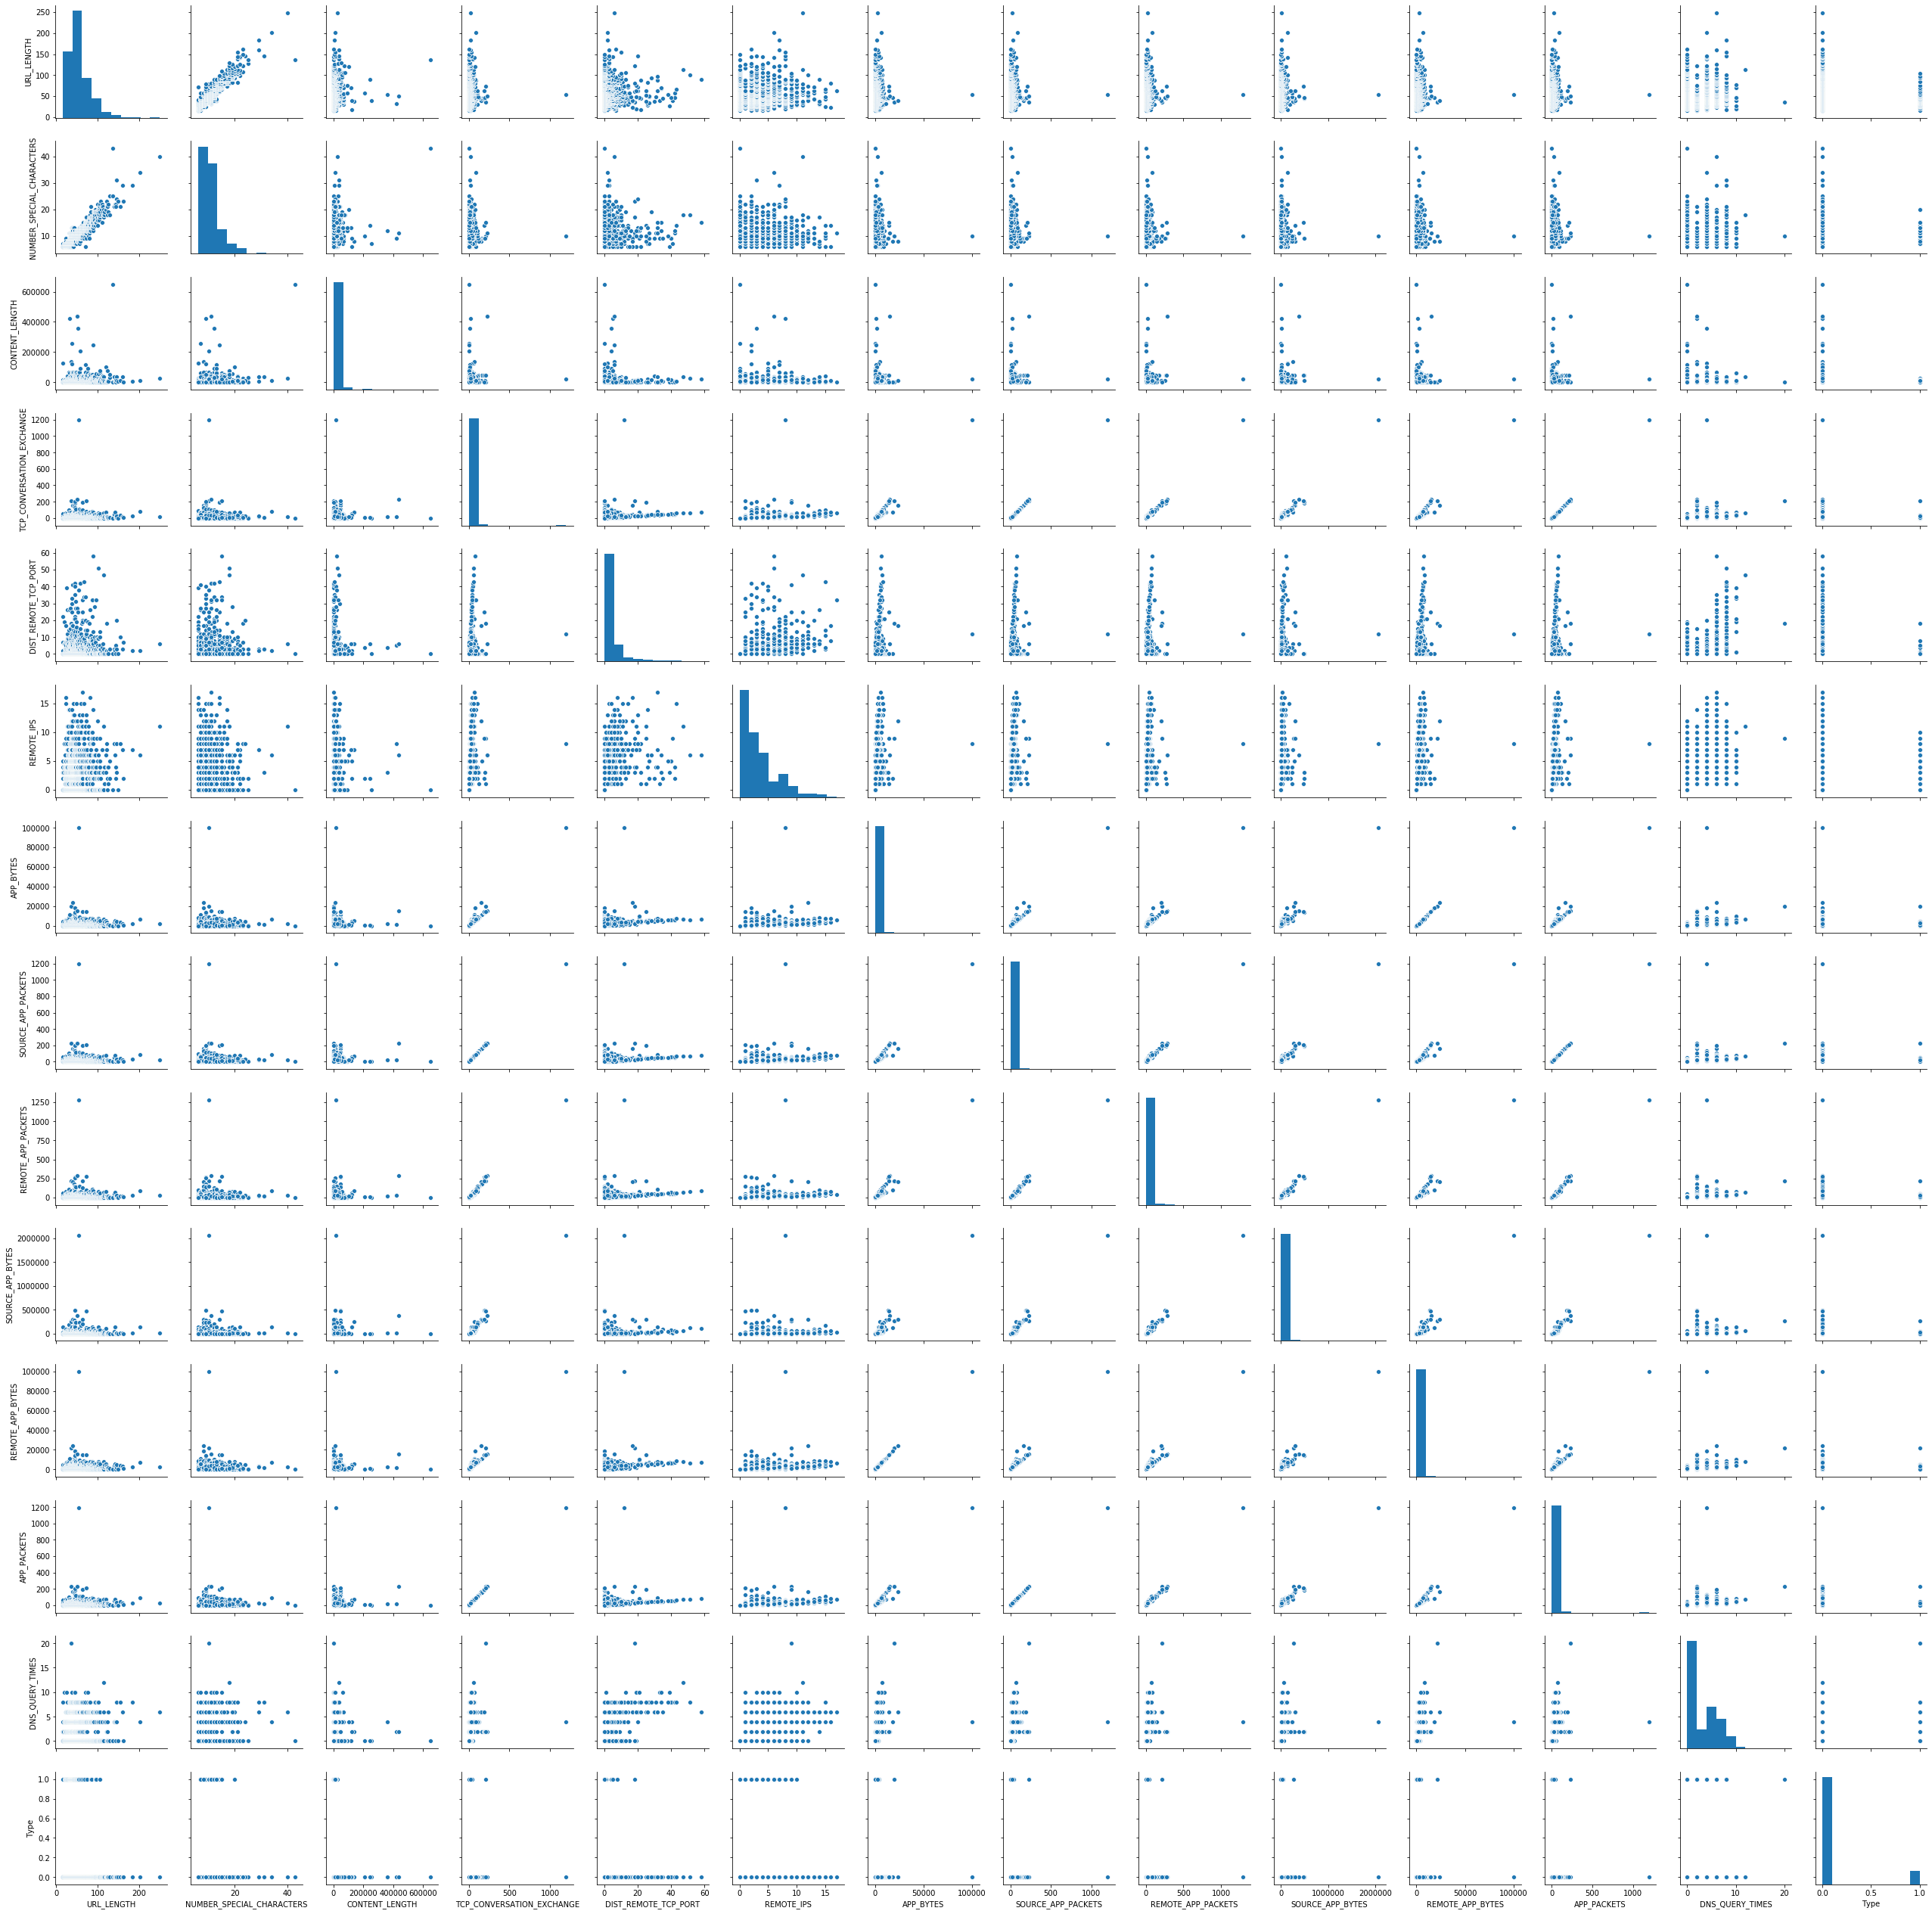

In [39]:
sns.pairplot(data)

ValueError: x and y must have same first dimension, but have shapes (1,) and (967,)

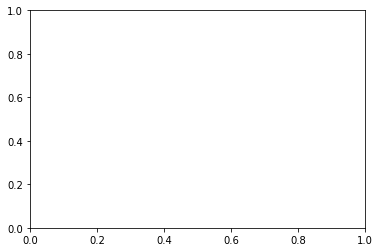

In [54]:
x = ax
y = data.APP_PACKETS
  
# first plot with X and Y data
plt.plot(x, y, '-.')
  

plt.xlabel("SOURCE_APP_PACKETS")
plt.ylabel("REMOTE_APP_PACKETS")
plt.title('APP_PACKETS')
plt.show()

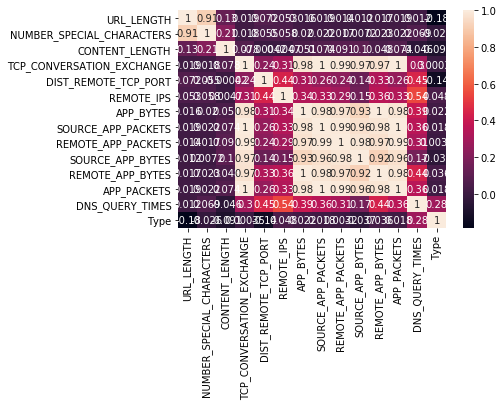

In [45]:

sns.heatmap(data.corr(), annot = True)

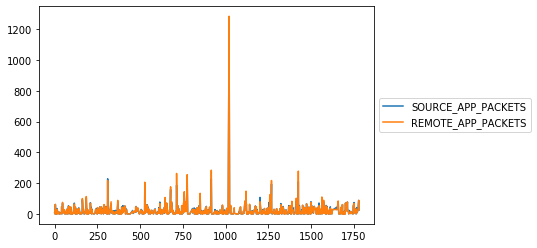

In [50]:
ax = data[["SOURCE_APP_PACKETS","REMOTE_APP_PACKETS"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1,0.5));

## separate the data

In [13]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
x.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0


In [15]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Type, dtype: int64

### spliting the data

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 967 non-null    int64  
 1   NUMBER_SPECIAL_CHARACTERS  967 non-null    int64  
 2   CONTENT_LENGTH             967 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  967 non-null    int64  
 4   DIST_REMOTE_TCP_PORT       967 non-null    int64  
 5   REMOTE_IPS                 967 non-null    int64  
 6   APP_BYTES                  967 non-null    int64  
 7   SOURCE_APP_PACKETS         967 non-null    int64  
 8   REMOTE_APP_PACKETS         967 non-null    int64  
 9   SOURCE_APP_BYTES           967 non-null    int64  
 10  REMOTE_APP_BYTES           967 non-null    int64  
 11  APP_PACKETS                967 non-null    int64  
 12  DNS_QUERY_TIMES            967 non-null    float64
 13  Type                       967 non-null    int64 

#  machine learning algorithm

## Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(random_state=0)  
model.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[255,   8],
       [ 11,  17]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.9347079037800687


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[256   7]
 [  8  20]]


In [28]:
ab = accuracy_score(y_test,y_pred)
print(ab)

0.9484536082474226


## SVM

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
ypred = classifier.predict(x_test)

In [31]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[256   7]
 [  8  20]]


In [32]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9484536082474226


## Gaussian Naïve Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
y_pred = classifier.predict(x_test) 

In [35]:
CON = confusion_matrix(y_test, y_pred)
print(CON)

[[116 147]
 [  2  26]]


In [36]:
ANN = accuracy_score(y_test,y_pred)
print(ANN)

0.4879725085910653
